In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import pandas as pd
import multiprocessing as mp
from scipy.signal import find_peaks
from scipy.optimize import minimize
import time
import tqdm

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
Use_given_sample = True
if(Use_given_sample):
    data_est = pd.read_csv("Data_8.csv", index_col=0)
else: #for this option please first run "get_sample" function from "Data_6.py" with interested parameters and combine all the out put file
    pd.read_csv("samples_torus_jump_combined.csv", index_col=0)
data_est['cnt'] = 1


data_est = data_est[data_est['N']==100]

df_est = data_est.groupby(['t', 'M', 'N']).mean(numeric_only=True)
df_N = df_est.index.get_level_values('N')
df_est['std'] = data_est.groupby(['t', 'M', 'N']).std(numeric_only=True)['tmax']
df_est['info'] = 1. / (df_est['std']**2 * df_N)
df_est['cnt'] = data_est.groupby(['t', 'M', 'N']).sum(numeric_only=True)['cnt']


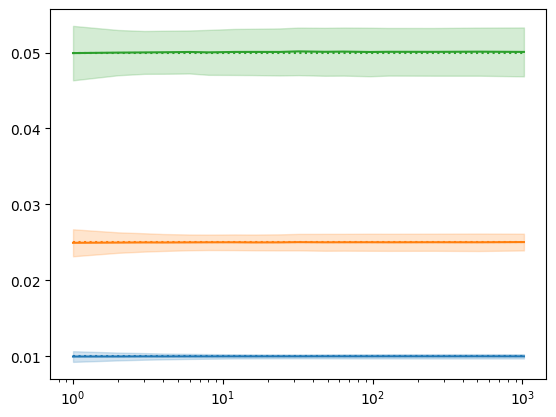

In [3]:
for i, (t, sdf) in enumerate(df_est[df_est.index.get_level_values('N')==100].groupby('t')):
    M = sdf.index.get_level_values('M')
    est = sdf['tmax']
    err = sdf['std']
    plt.plot(M, est, color=colors[i])
    plt.fill_between(M, est - err, est + err, alpha=0.2, color=colors[i])

    plt.plot(M, np.full(len(M), t), linestyle="dotted")
    


plt.xscale("log")

In [4]:

cmap = {}
for i, t in enumerate(df_est.index.get_level_values('t').unique()):
    cmap[t] = colors[i]
    
amap = {}
dmap = {}
Nvals = len(df_est.index.get_level_values('N').unique())
for i, N in enumerate(df_est.index.get_level_values('N').unique()):
    amap[N] = 1. - 0.3 * i / (Nvals - 1.) if Nvals > 1 else 1.0
    dmap[N] = [3] + [1, 1] * i + [1]



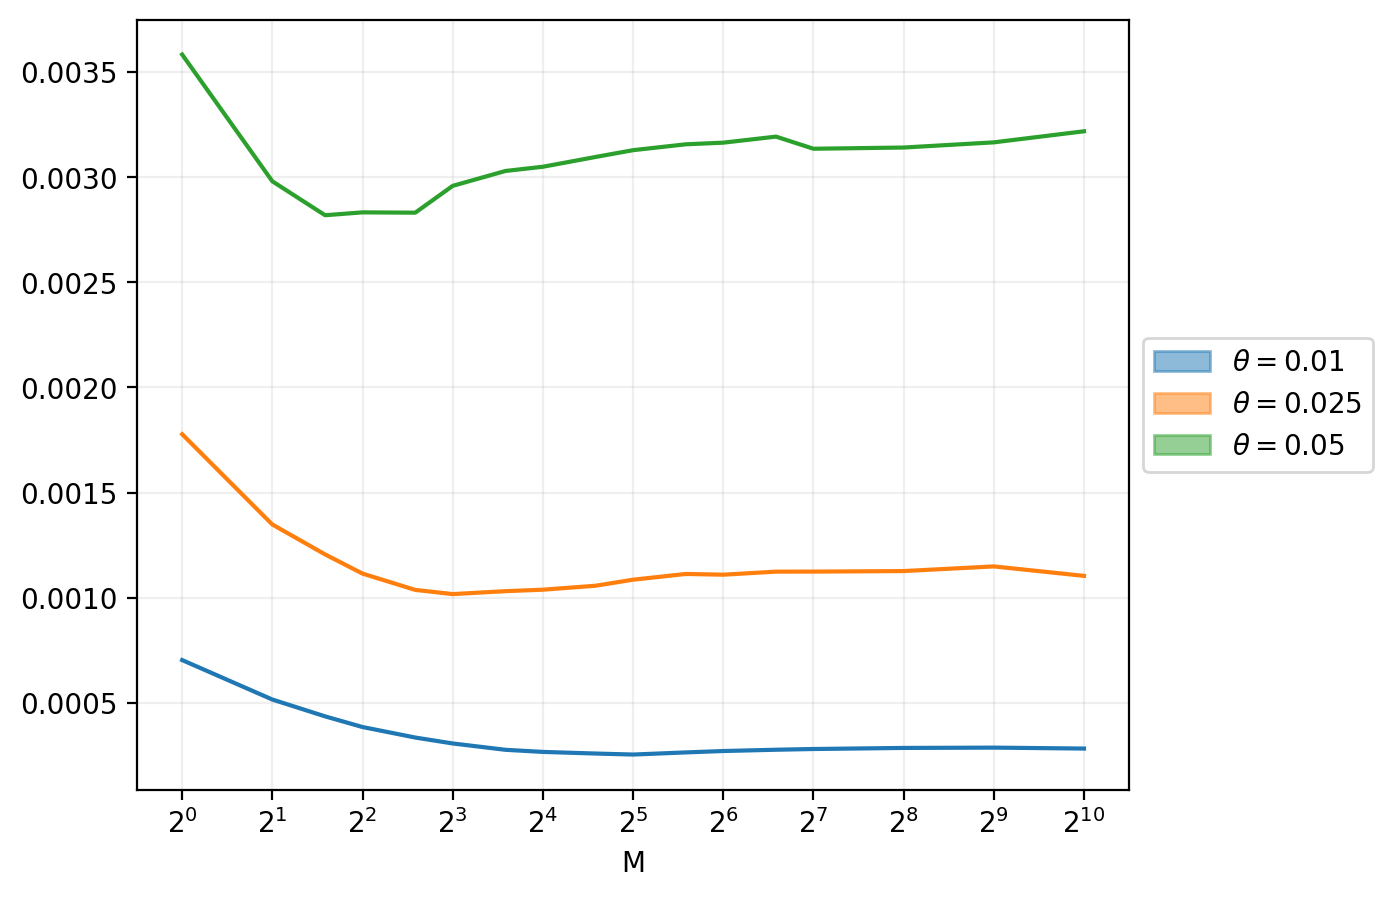

In [5]:
plt.figure(figsize=(8,5), dpi=200)


plt.xlabel("M")
plt.xscale("log")

legend = []

for i, (t, sdf) in enumerate(df_est.groupby('t')):
    legend += [Patch(facecolor=colors[i], edgecolor=colors[i], label="$\\theta = {0}$".format(t), alpha=0.5)]
    M = sdf.index.get_level_values('M')

for i, ((t, N), sdf) in enumerate(df_est.groupby(['t', 'N'])):
    M = sdf.index.get_level_values('M')
    est_std = sdf['std']
    plt.plot(M, est_std, color=cmap[t], alpha=amap[N])

ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(handles=legend, loc='center left', bbox_to_anchor=(1, 0.5)) #, title="$N = {}$".format(N))

plt.xticks(2**np.arange(11), ["$2^{" + str(x) + "}$" for x in np.arange(11)], minor=False)
plt.xticks([], [], minor=True)

plt.grid(which="both", alpha=0.2)


plt.show()